In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly.express as px
import numpy as np

In [4]:
stations_april_2022_df = pd.read_csv("./BIXI_Data/April 2022/20220104_stations.csv", delimiter = ",", index_col="pk")

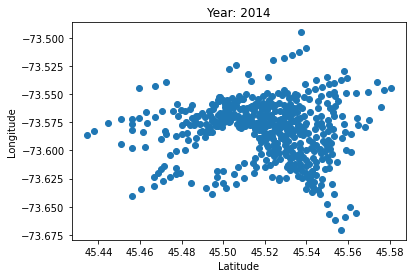

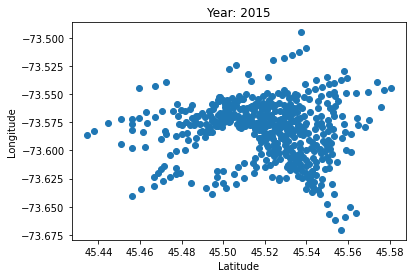

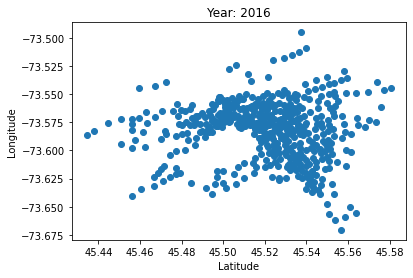

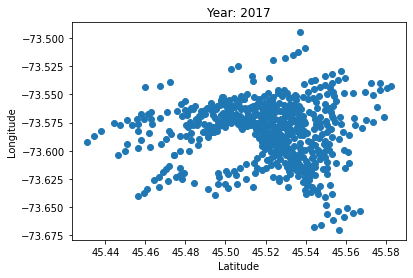

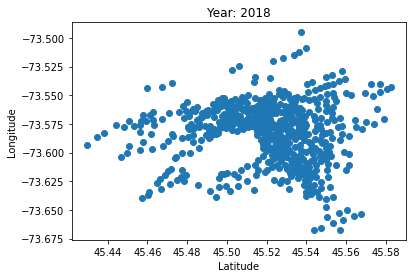

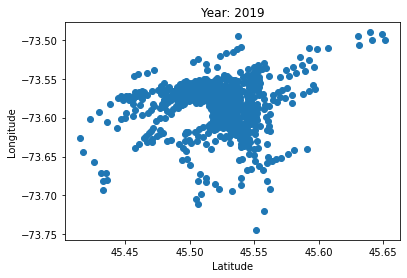

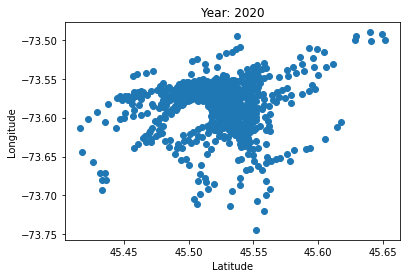

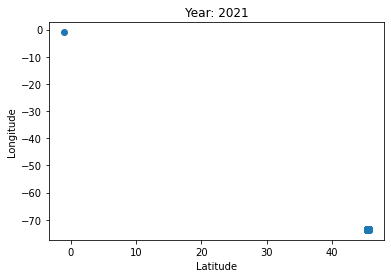

In [8]:
df_all = pd.DataFrame(columns = ["latitude","longitude","name", "Code"])
for year in range(2014,2022):
    link = f"./BIXI_Data/Year {year}/Stations_{year}.csv"
    Stations_df = pd.read_csv(link, delimiter = ",")
    Stations_df.rename(columns = {"code":"Code", "pk":"Code"}, inplace=True)
    plt.scatter(Stations_df["latitude"], Stations_df["longitude"])
    plt.title(f"Year: {year}")
    plt.xlabel("Latitude")
    plt.ylabel("Longitude")
    plt.show()      


### Problem with the 2021 Stations with an outlier value

In [14]:
Stations_df["latitude"].value_counts(bins = [-10, 0, 10, 20, 30, 40, 50])
Stations_df_2021 = Stations_df.copy()


In [15]:
Stations_df_2021 = Stations_df_2021[Stations_df_2021["latitude"] >= 0]
## Drop Station 856 Smith / Peel -1.0,-1.0

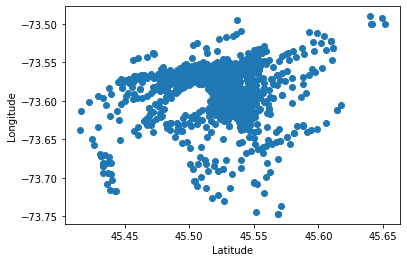

In [16]:
plt.scatter(Stations_df_2021["latitude"], Stations_df_2021["longitude"])
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [19]:
fig = px.scatter_mapbox(Stations_df_2021, 
                        lon = Stations_df_2021["longitude"], 
                        lat = Stations_df_2021["latitude"], 
                        zoom = 3, 
                        hover_name = Stations_df_2021["name"], 
                        width = 1200, 
                        height = 900, 
                        title = "Bixi Stations in Montreal"
)
fig.update_layout(mapbox_style = "open-street-map")
# fig.show()
# https://www.youtube.com/watch?v=1-6ndLqsy6M&ab_channel=SeanMacKenzieDataEngineering

## Merging Station Datasets

In [ ]:
# Finish columns until 2020
# Merge with 2021, 2022 with new codes
# Create maps with new stations as different colors 

In [150]:
def create_dataframe(start_year: int, end_year: int):
    df_all = pd.DataFrame(columns = ["latitude","longitude","name", "Code"])
    for year in range(start_year,end_year):
        link = f"./BIXI_Data/Year {year}/Stations_{year}.csv"
        Stations_df = pd.read_csv(link, delimiter = ",")
        Stations_df.rename(columns = {"code":"Code", "pk":"Code"}, inplace=True)
        df_all = Stations_df.merge(df_all.drop_duplicates(), on=["latitude","longitude","name","Code"], 
                    how='left', indicator=True)
        df_all[f'Station_{year}'] = 1.0
        df_all = df_all.drop('_merge', axis=1)
        print(year)
    return df_all
    

In [124]:
df_all.head()

,Code,name,latitude,longitude,Station_2014,Station_2015,Station_2016
0,6315,Lacombe / de la Côte-des-Neiges,45.496851,-73.623320,1.0,1.0,1.0
1,6019,Berri / Sherbrooke,45.517910,-73.567143,1.0,1.0,1.0
2,6347,Métro St-Michel (Shaughnessy / St-Michel),45.559199,-73.599658,1.0,1.0,1.0
3,6219,de l'Hôtel-de-Ville / Roy,45.517333,-73.574436,1.0,1.0,1.0
4,6211,Roy / St-Laurent,45.515610,-73.575690,1.0,1.0,1.0


In [125]:
df_all['Station_2014'].unique()

array([ 1., nan])

In [126]:
df_all[df_all['Station_2014'].isna()]

,Code,name,latitude,longitude,Station_2014,Station_2015,Station_2016
110,6748,Greene / St-Ambroise,45.478796,-73.576424,NaN,1.0,1.0
195,6035,Viger/Jeanne Mance,45.504803,-73.561200,NaN,NaN,1.0
280,6311,Drolet / St-Zotique,45.534795,-73.609546,NaN,1.0,1.0
288,6930,Paul Boutet / Jarry,45.559178,-73.614130,NaN,NaN,1.0
408,6752,Hutchison / Beaubien,45.526246,-73.613747,NaN,NaN,1.0
455,6753,St-Zotique / 39e avenue,45.573471,-73.574975,NaN,NaN,1.0
460,6754,Eadie/Dubois,45.457597,-73.590529,NaN,NaN,1.0


## Changes in code in 2017

In [127]:
df_all = df_all.fillna(0)

In [128]:
df_all[df_all['Station_2014'] == 0]

,Code,name,latitude,longitude,Station_2014,Station_2015,Station_2016
110,6748,Greene / St-Ambroise,45.478796,-73.576424,0.0,1.0,1.0
195,6035,Viger/Jeanne Mance,45.504803,-73.561200,0.0,0.0,1.0
280,6311,Drolet / St-Zotique,45.534795,-73.609546,0.0,1.0,1.0
288,6930,Paul Boutet / Jarry,45.559178,-73.614130,0.0,0.0,1.0
408,6752,Hutchison / Beaubien,45.526246,-73.613747,0.0,0.0,1.0
455,6753,St-Zotique / 39e avenue,45.573471,-73.574975,0.0,0.0,1.0
460,6754,Eadie/Dubois,45.457597,-73.590529,0.0,0.0,1.0


In [134]:
# Create the colors of each bullet points
df_all.loc[df_all['Station_2016'] == 1.0, 'color'] = 'B'

df_all.loc[df_all['Station_2014'] == 0.0, 'color'] = 'R'
df_all.loc[df_all['Station_2015'] == 0.0, 'color'] = 'O'


In [135]:
df_all['color'].unique()

array(['B', 'R', 'O'], dtype=object)

In [144]:
df_all[df_all['color'] == 'R']

,Code,name,latitude,longitude,Station_2014,Station_2015,Station_2016,color
110,6748,Greene / St-Ambroise,45.478796,-73.576424,0.0,1.0,1.0,R
280,6311,Drolet / St-Zotique,45.534795,-73.609546,0.0,1.0,1.0,R


In [139]:
df_all.head()

,Code,name,latitude,longitude,Station_2014,Station_2015,Station_2016,color
0,6315,Lacombe / de la Côte-des-Neiges,45.496851,-73.623320,1.0,1.0,1.0,B
1,6019,Berri / Sherbrooke,45.517910,-73.567143,1.0,1.0,1.0,B
2,6347,Métro St-Michel (Shaughnessy / St-Michel),45.559199,-73.599658,1.0,1.0,1.0,B
3,6219,de l'Hôtel-de-Ville / Roy,45.517333,-73.574436,1.0,1.0,1.0,B
4,6211,Roy / St-Laurent,45.515610,-73.575690,1.0,1.0,1.0,B


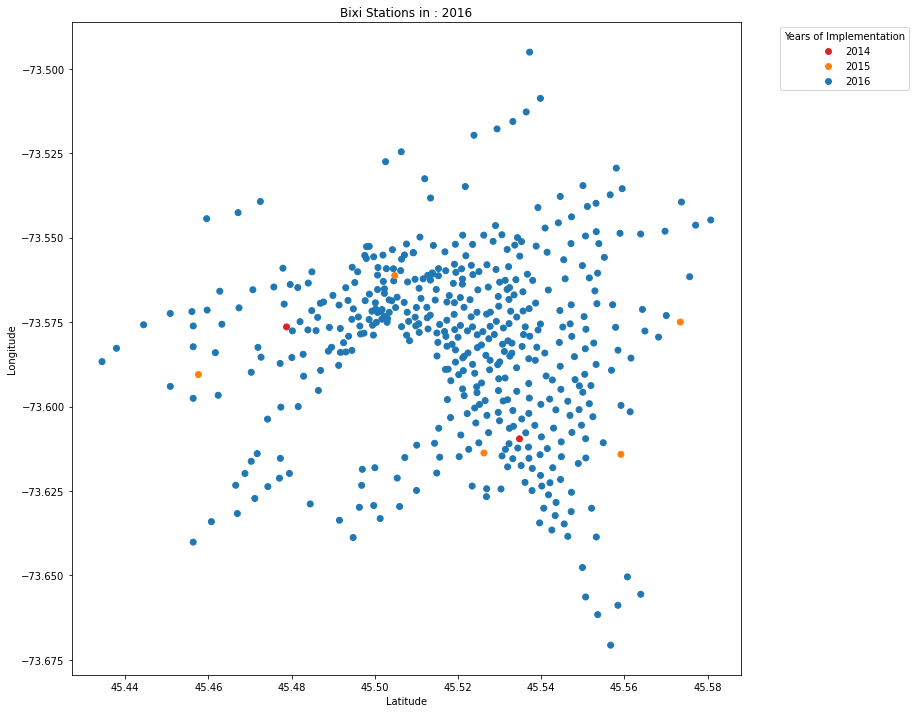

In [147]:
# Create the colors of each bullet points
fig, ax = plt.subplots(figsize=(12, 12))
colors = {'R':'tab:red', 'O':'tab:orange', 'B':'tab:blue'}
ax.scatter(df_all["latitude"], df_all["longitude"], c=df_all['color'].map(colors))

legend_handle = {'2014':'tab:red', '2015':'tab:orange', '2016':'tab:blue'}
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in legend_handle.items()]
ax.legend(title='Years of Implementation', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')


plt.title(f"Bixi Stations in : {year}")
plt.xlabel("Latitude")
plt.ylabel("Longitude")

plt.show()





### Change codes in 2017 onward

In [157]:
Stations_2016 = pd.read_csv("./BIXI_Data/Year 2016/Stations_2016.csv", delimiter = ",")
Stations_2017 = pd.read_csv("./BIXI_Data/Year 2017/Stations_2017.csv", delimiter = ",")

In [158]:
Stations_2016.head()

,code,name,latitude,longitude
0,6315,Lacombe / de la Côte-des-Neiges,45.496851,-73.623320
1,6019,Berri / Sherbrooke,45.517910,-73.567143
2,6347,Métro St-Michel (Shaughnessy / St-Michel),45.559199,-73.599658
3,6219,de l'Hôtel-de-Ville / Roy,45.517333,-73.574436
4,6211,Roy / St-Laurent,45.515610,-73.575690


In [159]:
Stations_2017.head()

,code,name,latitude,longitude
0,7015,LaSalle / 4e avenue,45.430740,-73.591911
1,6714,LaSalle / Sénécal,45.434434,-73.586694
2,6712,LaSalle / Crawford,45.437914,-73.582740
3,6715,Natatorium (LaSalle / Rolland),45.444408,-73.575568
4,7048,Métro Angrignon,45.446534,-73.603541


In [170]:
Stations_2016_2017 = Stations_2017.merge(Stations_2016.drop_duplicates(), on=["latitude","longitude"], 
                how='left', indicator=True)

In [171]:
Stations_2016_2017.head()

,code_x,name_x,latitude,longitude,code_y,name_y,_merge
0,7015,LaSalle / 4e avenue,45.430740,-73.591911,NaN,NaN,left_only
1,6714,LaSalle / Sénécal,45.434434,-73.586694,6714.0,LaSalle / Sénécal,both
2,6712,LaSalle / Crawford,45.437914,-73.582740,6712.0,LaSalle / Crawford,both
3,6715,Natatorium (LaSalle / Rolland),45.444408,-73.575568,NaN,NaN,left_only
4,7048,Métro Angrignon,45.446534,-73.603541,NaN,NaN,left_only


In [172]:
Stations_2016_2017['_merge'].value_counts()

both          283
left_only     263
right_only      0
Name: _merge, dtype: int64

In [169]:
Stations_2016

,code,name,latitude,longitude
0,6315,Lacombe / de la Côte-des-Neiges,45.496851,-73.623320
1,6019,Berri / Sherbrooke,45.517910,-73.567143
2,6347,Métro St-Michel (Shaughnessy / St-Michel),45.559199,-73.599658
3,6219,de l'Hôtel-de-Ville / Roy,45.517333,-73.574436
4,6211,Roy / St-Laurent,45.515610,-73.575690
...,...,...,...,...
460,6754,Eadie/Dubois,45.457597,-73.590529
461,6005,Metcalfe / Square Dorchester,45.500234,-73.571126
462,6383,Bourbonnière / du Mont-Royal,45.553571,-73.560494
463,6359,Parc Plage,45.502602,-73.527503
